# **CASE: VENDA DE VEÍCULOS**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### Leitura da base de dados

In [2]:
dados_veiculos = pd.read_csv( "../Dados/Venda_Veiculos.txt",sep= "\t")

### Visualização da base de dados

In [3]:
dados_veiculos

,Tempo_Experiencia,Valor_Medio_Mensal_Vendas
0,1,775
1,1,630
2,2,775
3,2,1046
4,3,752
5,3,255
6,3,1049
7,3,701
8,3,418
9,4,871


### Análise exploratória breve

In [4]:
# Medidas resumo
dados_veiculos.describe()

,Tempo_Experiencia,Valor_Medio_Mensal_Vendas
count,30.000000,30.000000
mean,7.866667,1071.233333
std,5.348112,412.768256
min,1.000000,255.000000
25%,3.000000,757.750000
50%,7.500000,1055.000000
75%,10.750000,1366.500000
max,20.000000,2215.000000


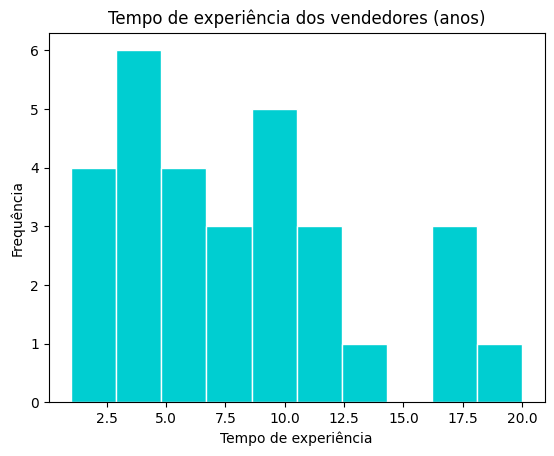

In [5]:
# Histograma do tempo de experiência dos vendedores
plt.hist(dados_veiculos['Tempo_Experiencia'], color='darkturquoise', edgecolor='white',bins=10)
plt.xlabel('Tempo de experiência')
plt.ylabel('Frequência')
plt.title('Tempo de experiência dos vendedores (anos)')
plt.show() 

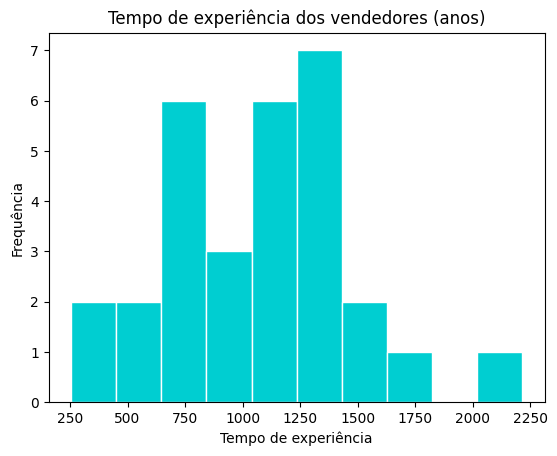

In [6]:
# Histograma do valor médio mensal em vendas
plt.hist(dados_veiculos['Valor_Medio_Mensal_Vendas'], color='darkturquoise', edgecolor='white',bins=10)
plt.xlabel('Tempo de experiência')
plt.ylabel('Frequência')
plt.title('Tempo de experiência dos vendedores (anos)')
plt.show() 

### Análise bivariada: variável resposta vs. variáveis explicativas

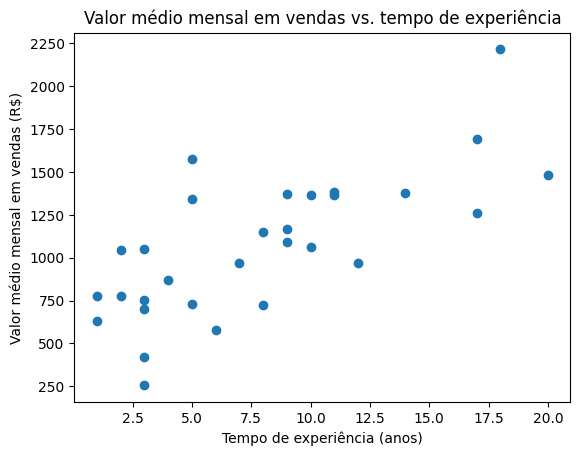

In [7]:
# Gráfico de dispersão
plt.scatter(dados_veiculos['Tempo_Experiencia'],dados_veiculos['Valor_Medio_Mensal_Vendas'])
plt.xlabel('Tempo de experiência (anos)')
plt.ylabel('Valor médio mensal em vendas (R$)')
plt.title("Valor médio mensal em vendas vs. tempo de experiência")
plt.show() 

In [8]:
# Coeficiente de correlação
dados_veiculos.corr()

,Tempo_Experiencia,Valor_Medio_Mensal_Vendas
Tempo_Experiencia,1.000000,0.725681
Valor_Medio_Mensal_Vendas,0.725681,1.000000


### Modelo de regressão linear simples

In [9]:
# Ajuste do modelo
modelo = sm.OLS(dados_veiculos['Valor_Medio_Mensal_Vendas'], 
                sm.add_constant(dados_veiculos['Tempo_Experiencia']))
resultado = modelo.fit()

In [10]:
#PValues 
#Col [0.025 é o Limite Inferior (intervalor confiança)
#Col 0.975] é o Limite Superior (intervalor confiança)

summary_table = resultado.summary2().tables[1]
summary_table['P>|t|'] = summary_table['P>|t|'].apply(lambda x: '{:.10f}'.format(x))
summary_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,630.635509,94.957081,6.641269,0.0000003319,436.124746,825.146271
Tempo_Experiencia,56.008198,10.035407,5.581059,0.0000056827,35.451599,76.564797


In [11]:
resultado.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.510
1,Dependent Variable:,Valor_Medio_Mensal_Vendas,AIC:,427.0572
2,Date:,2024-07-29 02:41,BIC:,429.8596
3,No. Observations:,30,Log-Likelihood:,-211.53
4,Df Model:,1,F-statistic:,31.15
5,Df Residuals:,28,Prob (F-statistic):,5.68e-06
6,R-squared:,0.527,Scale:,83535.


In [12]:
resultado.summary2().tables[2]

,0,1,2,3
0,Omnibus:,0.928,Durbin-Watson:,2.858
1,Prob(Omnibus):,0.629,Jarque-Bera (JB):,0.559
2,Skew:,0.333,Prob(JB):,0.756
3,Kurtosis:,2.943,Condition No.:,17


### Gráfico de dispersão com reta ajustada

/tmp/ipykernel_2826/1914838498.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = resultado.params[0] + resultado.params[1] * x_vals


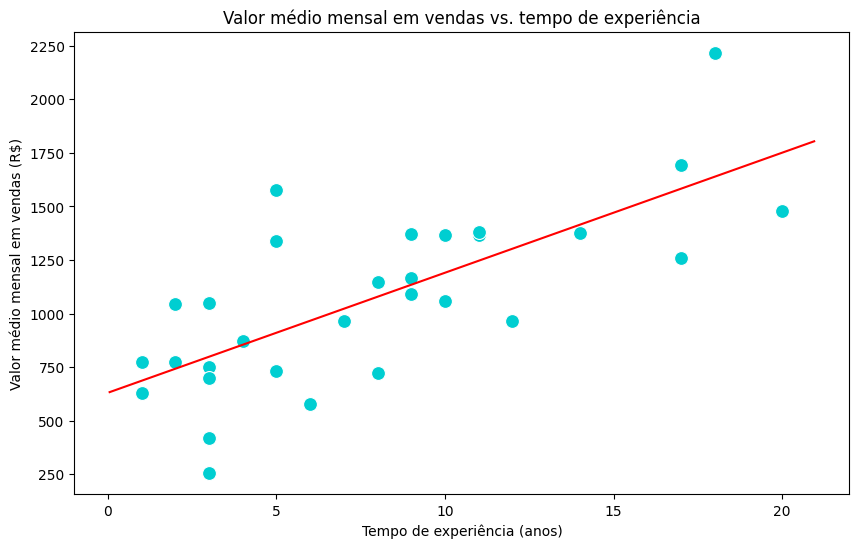

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempo_Experiencia', y='Valor_Medio_Mensal_Vendas', data=dados_veiculos, color='darkturquoise', s=100)
plt.xlabel('Tempo de experiência (anos)')
plt.ylabel('Valor médio mensal em vendas (R$)')
plt.title('Valor médio mensal em vendas vs. tempo de experiência')

# Adicionando a linha de regressão
x_vals = np.array(plt.gca().get_xlim())
y_vals = resultado.params[0] + resultado.params[1] * x_vals
plt.plot(x_vals, y_vals, color='red')

plt.show()

### Qualidade de ajuste

In [14]:
# Acessando valores resultantes do modelo
r_squared = resultado.rsquared
r_squared_adj = resultado.rsquared_adj
coeficientes = resultado.params
p_values = resultado.pvalues
std_err = resultado.bse
valores_preditos = resultado.fittedvalues
residuos = resultado.resid

# Exibindo os valores
# print(f'R ao quadrado: {r_squared}')
# print(f'R ao quadrado ajustado: {r_squared_adj}')
# print(f'Coeficientes: \n{coeficientes}')
# print(f'p-valores: \n{p_values}')
# print(f'Erros padrão: \n{std_err}')
# print(f'Valores preditos: \n{valores_preditos}')
# print(f'Resíduos: \n{residuos}')


In [16]:
# Coeficiente de determinação (R²)
print(resultado.rsquared)

0.5266129798336201


In [17]:
# MAE
print(mean_absolute_error(dados_veiculos['Valor_Medio_Mensal_Vendas'], resultado.fittedvalues))

216.0349729411134


In [18]:
# MAPE
print(mean_absolute_percentage_error(dados_veiculos['Valor_Medio_Mensal_Vendas'], resultado.fittedvalues))

0.2704589947698881


### Análise de resíduos

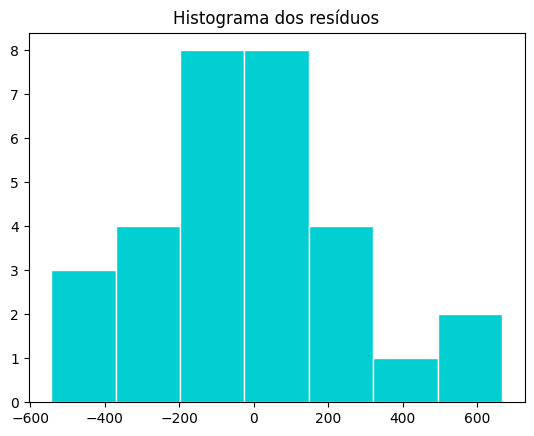

In [19]:
# Histograma dos resíduos
plt.hist(resultado.resid, color='darkturquoise', edgecolor='white',bins=7)
plt.title('Histograma dos resíduos')
plt.show() 

In [20]:
import pylab as py

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


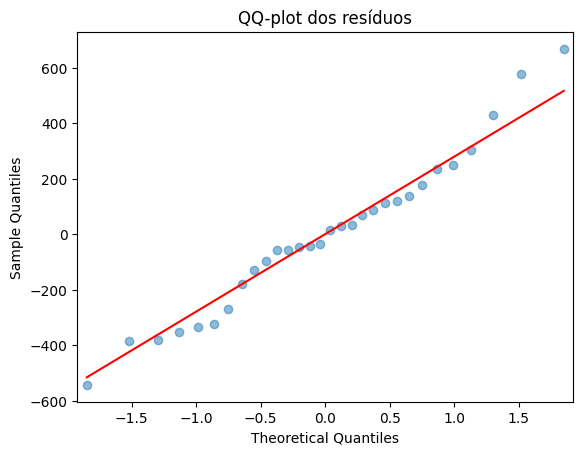

In [21]:
# QQ plot dos resíduos
sm.qqplot(resultado.resid, line='s', color='darkturquoise', marker='o', alpha=0.5)
plt.title("QQ-plot dos resíduos")
plt.show()

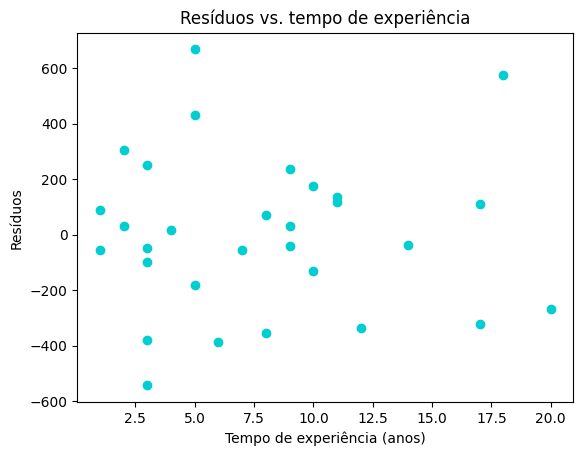

In [22]:
# Resíduos vs. tempo de experiência
plt.scatter(dados_veiculos['Tempo_Experiencia'],resultado.resid, color='darkturquoise')
plt.xlabel('Tempo de experiência (anos)')
plt.ylabel('Resíduos')
plt.title("Resíduos vs. tempo de experiência")
plt.show() 

### Exemplo de uso (aplicação) do modelo

In [23]:
# Criação de base de dados com um novo vendedor, com 12 anos de experiência
# Obs.: o nome de coluna deve ser idêntico ao da base utilizada para construção do modelo ("Tempo_Experiencia") --- no Python n precisa, porém temos q adicinoar o "constant"
novos_dados = pd.DataFrame({"Tempo_Experiencia":[12,13,14]})
novos_dados = sm.add_constant(novos_dados)
novos_dados


,const,Tempo_Experiencia
0,1.0,12
1,1.0,13
2,1.0,14


In [24]:
# Aplicação do modelo
novos_dados["Tempo_Experiencia_Predito"] = resultado.predict(novos_dados)
novos_dados

,const,Tempo_Experiencia,Tempo_Experiencia_Predito
0,1.0,12,1302.733885
1,1.0,13,1358.742083
2,1.0,14,1414.750281
